In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score 

# Regressão

In [2]:
taxis = pd.read_csv('../assets/taxis.csv')

In [3]:
taxis.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


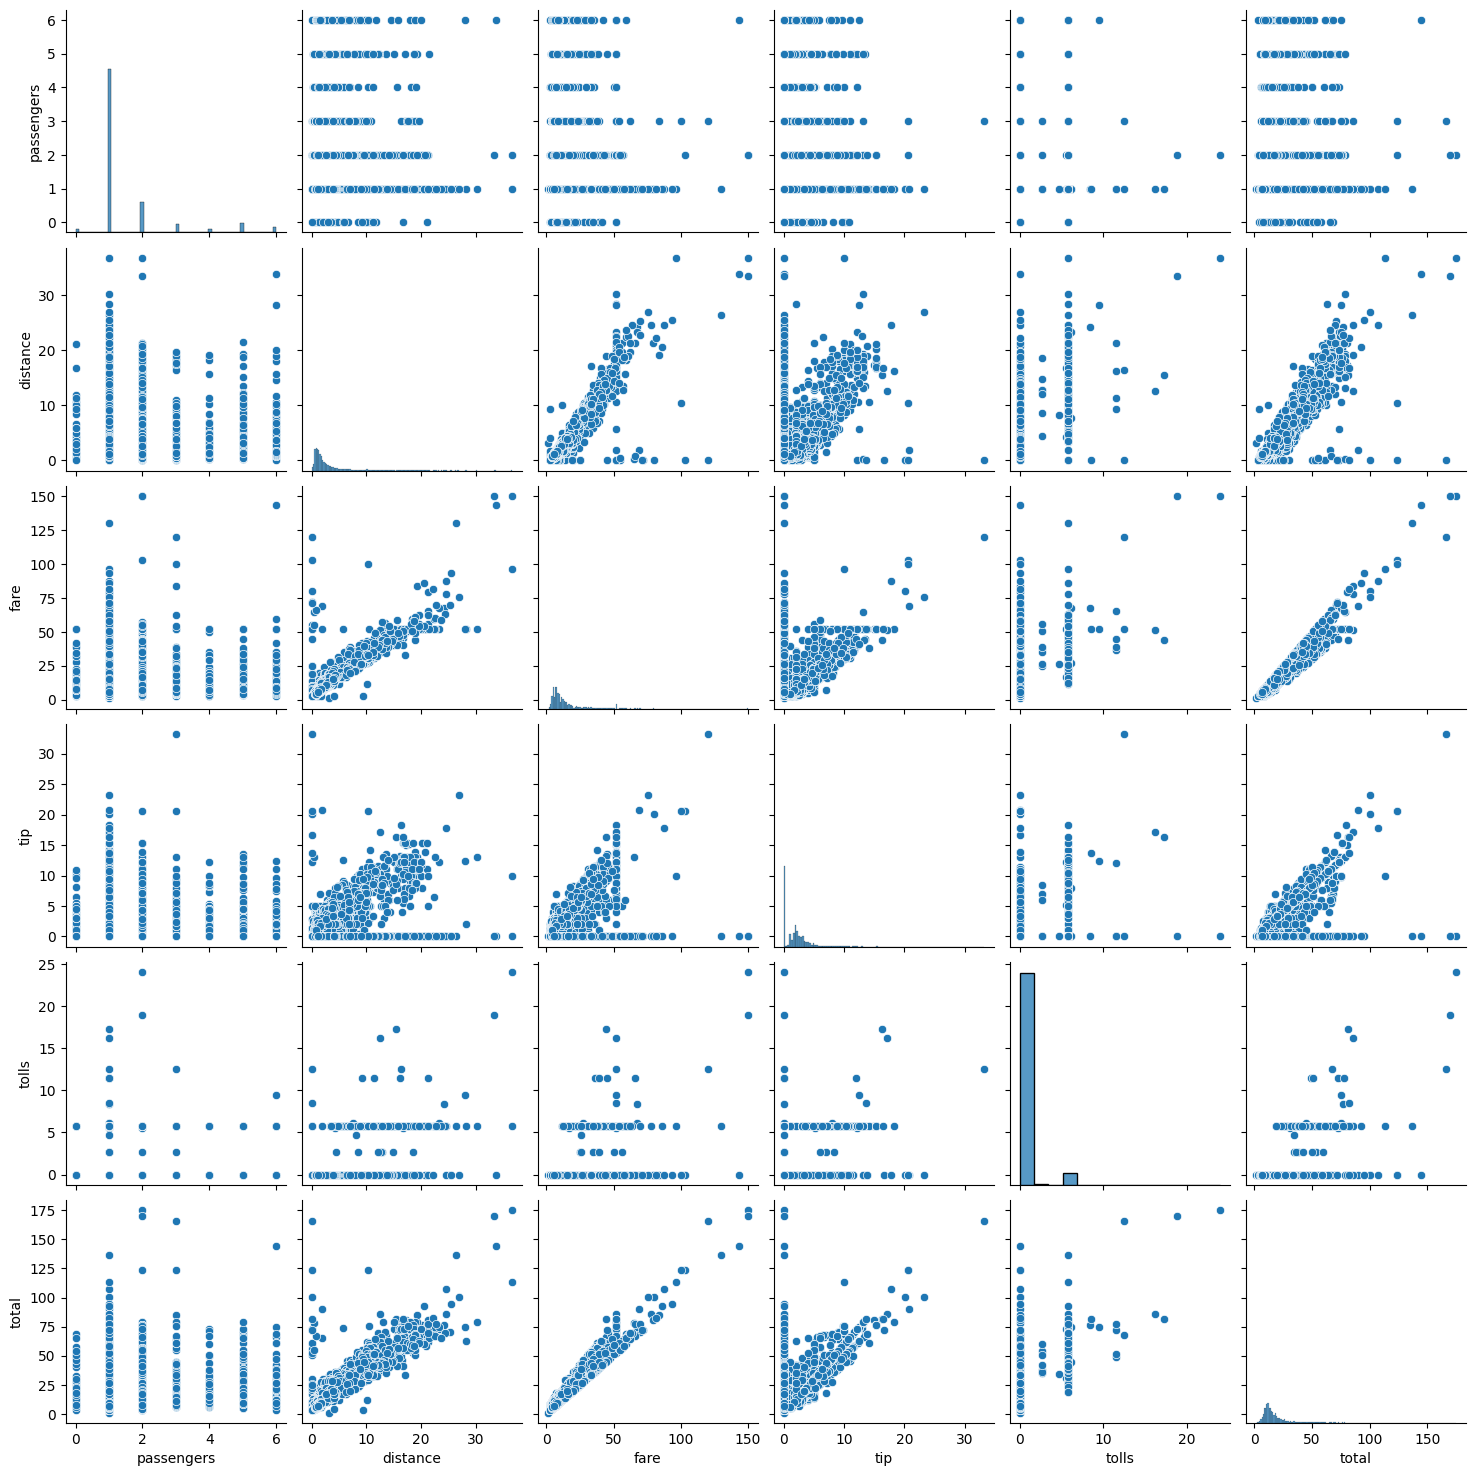

In [5]:
sns.pairplot(taxis)

In [7]:
X = taxis[['distance', 'fare', 'total']]
y = taxis['tip']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
reg = LinearRegression()
reg_fitted = reg.fit(X_train, y_train)

In [10]:
y_pred = reg_fitted.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.8225917582050808

In [14]:
mean_absolute_error(y_test, y_pred)

0.7348422676572938

# Classificação

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [18]:
iris = sns.load_dataset('iris')

In [19]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [20]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
rlog = LogisticRegression()
rlog_fitted = rlog.fit(X_train, y_train)

In [25]:
y_pred = rlog_fitted.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.88      0.94        17
   virginica       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

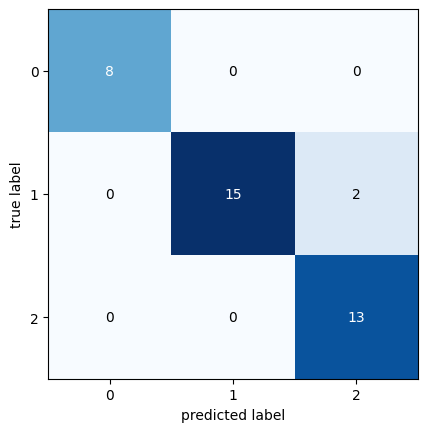

In [31]:
mat_conf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat_conf)